In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

WARNING  Ultralytics settings reset to defaults. 
This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
You may view and update settings directly in 'C:\Users\dellb\AppData\Roaming\Ultralytics\settings.yaml'


In [2]:
# model=YOLO('./YOLO weights/yolov5su.pt') #small,medium,large

In [3]:
import torch
model=torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\dellb/.cache\torch\hub\ultralytics_yolov5_master
requirements: YOLOv8 requirements "gitpython>=3.1.30" "torchvision>=0.8.1" "ultralytics>=8.0.111" "setuptools>=65.5.1" not found, attempting AutoUpdate...

requirements: 4 packages updated per C:\Users\dellb\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-6-27 Python-3.10.8 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
img= cv2.imread('./images/bikes.jpg')
# cv2.resize(img,(640,480))

In [5]:
# while True:
#     results2=model(img,show=True)
#     if cv2.waitKey(0):
#         break

In [6]:
results=model(img)
results.print()

image 1/1: 360x640 17 motorcycles
Speed: 12.9ms pre-process, 282.4ms inference, 18.1ms NMS per image at shape (1, 3, 384, 640)


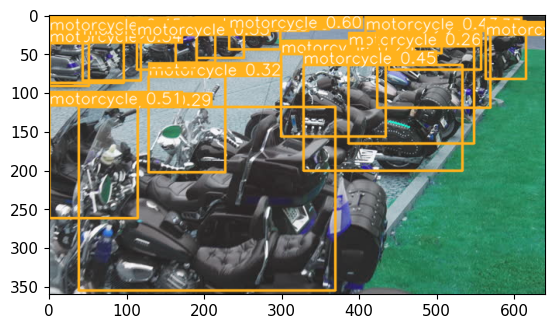

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
# results.xyxy
# results.show()
# results.render()

### realtime detections

In [9]:
cap=cv2.VideoCapture(0)

while cap.isOpened():
    ret,img=cap.read()
    
    results=model(img)
    
    cv2.imshow("img",np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#### collecting images

In [9]:
import uuid  #unique id
import os
import time

In [10]:
IMAGES_PATH=os.path.join('data','images')
labels=['awake','drowsy']
number_imgs=20

In [46]:
cap=cv2.VideoCapture(0)

for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)
    
    for i in range(20):
        print("Collecting images for {}, image number {}".format(label,i))
        
        ret,img=cap.read()
        
        imgname=os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,img)
        cv2.imshow("Image collection",img)
        time.sleep(2)
        
         
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [47]:
!git clone https://github.com/heartexlabs/labelImg.git

Cloning into 'labelImg'...


In [49]:
####installing dependencies pyqt5 and lxml
!pip install pyqt5 lxml 
#####initializing labelImg
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc 

In [50]:
!cd yolov5 && python train.py --img 320 --batch 32 --epochs 200 --data dataset.yaml --weights yolov5s.pt --workers 2

^C


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'D:\yolo': No such file or directory
YOLOv5  2023-6-28 Python-3.10.8 torch-2.0.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0

### load custom model

In [85]:
model=torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/runs/train/trained_on_colab/last.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\dellb/.cache\torch\hub\master.zip
requirements: YOLOv8 requirements "gitpython>=3.1.30" "torchvision>=0.8.1" "ultralytics>=8.0.111" "setuptools>=65.5.1" not found, attempting AutoUpdate...

requirements: 4 packages updated per C:\Users\dellb\.cache\torch\hub\ultralytics_yolov5_master\requirements.txt
requirements:  Restart runtime or rerun command for updates to take effect

YOLOv5  2023-6-29 Python-3.10.8 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [95]:
img='images/drowsy-driving-prevention.jpg'

In [96]:
results=model(img)

In [97]:
results.print()

image 1/1: 483x724 1 drowsy
Speed: 30.5ms pre-process, 414.0ms inference, 0.0ms NMS per image at shape (1, 3, 448, 640)


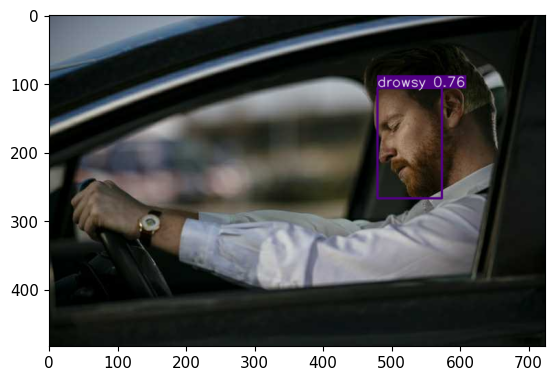

In [98]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [90]:
cap=cv2.VideoCapture(0)

while cap.isOpened():
    ret,img=cap.read()
    
    results=model(img)
    
    cv2.imshow("img",np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()